# <span style="color:blue"> Laboratorio 10 - Neural Network regression </span>

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

Durante l'esercitazione è stato sfruttato del *machine learning* per eseguire regressioni su *noisy data* mediante l'utilizzo di una **Neural Network(NN)**.

E' stata inoltre esplorata la abilità della NN di fare *fitting*.

## The Prediction Problem
*La seguente parte è stata prelevata dal notebook `LSN_Exercises_11` fornito a lezione*.
***
Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.
***

All' interno del laboratorio saranno esplorate diverse **funzioni di attivazione** e diverse **funzioni di Loss**.

## Exercise 11.1 
Per far pratica con le reti neurali, è stato studiato il funzionamento di una **NN** nell' eseguire una regressione lineare. 

L' obbiettivo è capire come l'esecuzione del task dipenda da $N_{\mathrm{epochs}}$, il numero di epoche e da $N_{\mathrm{train}}$, il numero di dati di training e dal rumore $\sigma$ dei dati di input.

La funzione lineare considerata è la seguente:
$$
f(x)=2x+1
$$

Il codice funzionante è stato preso dal notebook`LSN_Exercises_11` fornito a lezione.
In esso è implementata una rete a **un solo neurone**, il quale riceve un *input* $x$ e restituisce un *output* $y = \omega x+b$ dove $\omega$ e $b$ rappresentano rispettivamente il *peso* e il *bias* nel neurone e sono i parametri che il modello vuole calibare per adattarsi a $y = 2x+1$.

Ho studiato quindi cosa accade modificando il $N_{epochs}$, mantenendo fisso il rumore a $\sigma = 0.3$ e il numero di dati di training a $N_{train} = 1000$. Idealmete  , aumentando il numero di $N_{train}$ il fit dovrebbe migliorare e aumentando $\sigma$, mantenendo fissi gli alri parametri, il fit dovrebbe peggiorare.

Ho riportato i seguenti due casi :  `N_epochs = 10 `  e `N_epochs = 30`.

In [5]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [6]:
#parametri modificabili
N_epochs = [10,30]
N_train = 1000
N_test = 50
sigma = 0.3

In [7]:
# generate TRAINING SET e VALIDATION DATA SET as inputs
np.random.seed(0)  #setto il seme del generatore in modo che sia riproducibile
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_test)
x_valid.sort()
y_target = m * x_valid + b # ideal (target): linear function. è la label: ovvero la perfetta ordinata

y_train = np.random.normal(m * x_train + b, sigma)
y_valid = np.random.normal(m * x_valid + b, sigma)

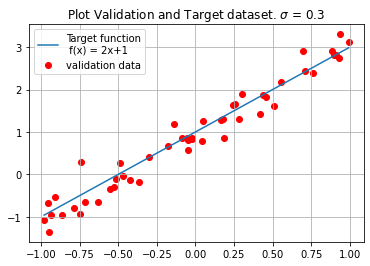

In [8]:
# plot validation and target dataset
plt.plot(x_valid, y_target, label='Target function\n f(x) = 2x+1')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.title('Plot Validation and Target dataset. '+"$\sigma$ = "+str(sigma))
plt.legend()
plt.grid(True)
plt.show()


Nel grafico sopra sono *plottati* i dati di **test** che verranno utilizzati per l validazione finale, ovvero il confronto con la funzione Target.

**Genero la rete neurale** formata da 1 solo nodo. Sono generate $2$ NN differenti per i $2$ valori di $N_{epochs}$ in studio.

In [9]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))  #vuole soltanto un numero in input

model2 = tf.keras.Sequential()
model2.add(Dense(1, input_shape=(1,)))  #vuole soltanto un numero in input

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])


In [10]:
# get a summary of our composed model
#model.summary()

#model2.summary()

In [11]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
print("Primo modello, con "+str(N_epochs[0])+" Epochs")
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=N_epochs[0],
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

print("Secondo modello, con "+str(N_epochs[1])+" Epochs")
history2 = model2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs= N_epochs[1],
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Primo modello, con 10 Epochs
Epoch 1/10
32/32 [==============================] - 1s 14ms/step - loss: 1.6806 - mse: 1.6806 - val_loss: 1.2104 - val_mse: 1.2104
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.9090 - mse: 0.9090 - val_loss: 0.7429 - val_mse: 0.7429
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.5604 - mse: 0.5604 - val_loss: 0.5007 - val_mse: 0.5007
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.3758 - mse: 0.3758 - val_loss: 0.3572 - val_mse: 0.3572
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2682 - mse: 0.2682 - val_loss: 0.2671 - val_mse: 0.2671
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.2027 - mse: 0.2027 - val_loss: 0.2072 - val_mse: 0.2072
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.1615 - mse: 0.1615 - val_loss: 0.1672 - val_mse: 0.1672
Epoch 8/10
32/32 [==============================] - 0s 4ms/s

In [250]:
print("Weights and biasis."+str(N_epochs[0])+" Epochs")
w,b = model.get_weights()
print("     Coefficiente Angolare : "+str(w))
print("     Intercetta : "+str(b))

print("\nWeights and biasis."+str(N_epochs[1])+" Epochs")
w,b = model2.get_weights()
print("     Coefficiente Angolare : "+str(w))
print("     Intercetta : "+str(b))

Weights and biasis.10 Epochs
     Coefficiente Angolare : [[1.8981553]]
     Intercetta : [1.0087354]

Weights and biasis.30 Epochs
     Coefficiente Angolare : [[1.987306]]
     Intercetta : [1.0167533]


In [15]:
#====== 10 epoche======
print('\033[1m' + '     10 Epoche' + '\033[0m') 
print("\nPerformance TEST DATA")
score_t = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score_t[0])
print('Test accuracy:', score_t[1])
# evaluate model with the exact curve
print("\nPerformance CURVA ESATTA")
score_e = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score_e[0])
print('Test accuracy:', score_e[1])

#====== 30 epoche======
print("\n")
print('\033[1m' + '     30 Epoche' + '\033[0m') 
print("\nPerformance TEST DATA")
score2_t = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score2_t[0])
print('Test accuracy:', score2_t[1])
# evaluate model with the exact curve
print("\nPerformance CURVA ESATTA")
score2_e = model2.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score2_e[0])
print('Test accuracy:', score2_e[1])

     10 Epoche

Performance TEST DATA
Test loss: 0.10802118480205536
Test accuracy: 0.10802118480205536

Performance CURVA ESATTA
Test loss: 0.019153431057929993
Test accuracy: 0.019153431057929993


     30 Epoche

Performance TEST DATA
Test loss: 0.07637344300746918
Test accuracy: 0.07637344300746918

Performance CURVA ESATTA
Test loss: 0.0002557623665779829
Test accuracy: 0.0002557623665779829


4/4 [==============================] - 0s 4ms/step


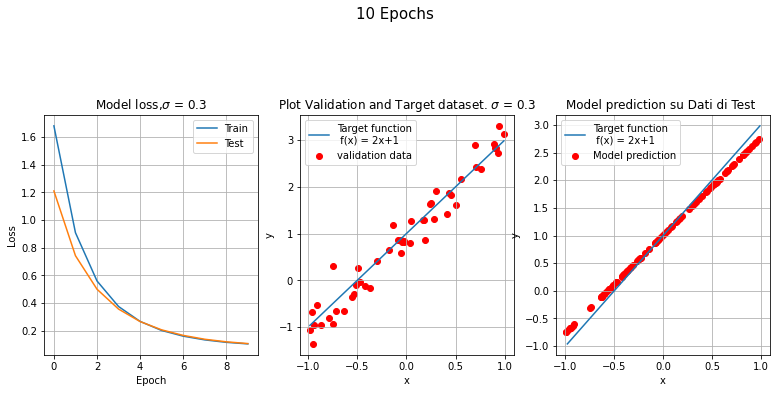

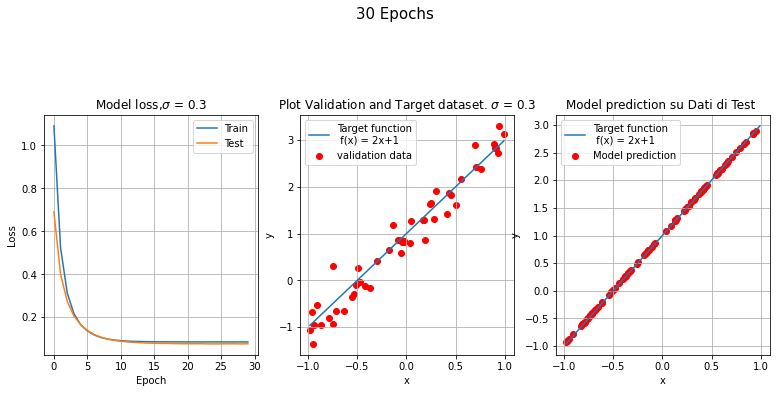

In [21]:
# look into training history
# Plot training & validation loss values
history_plot=[history,history2]
model_plot=[model,model2]
for i in range (0,2):
    plt.figure(figsize=(13,15))
    plt.suptitle(str(N_epochs[i])+" Epochs",fontsize = 15) 
# Andamenti della funzione di Loss   
    plt.subplot(3,3,1)
    plt.plot(history_plot[i].history['loss'])
    plt.plot(history_plot[i].history['val_loss'])
    plt.title('Model loss,$\sigma$ = '+str(sigma))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.grid(True)
# Dati di test e funzione target
    plt.subplot(3,3,2)
    plt.plot(x_valid, y_target, label='Target function\n f(x) = 2x+1')
    plt.scatter(x_valid, y_valid, color='r', label='validation data')
    plt.title('Plot Validation and Target dataset. '+"$\sigma$ = "+str(sigma))
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)    
# Predizioni sui dati di Test
    plt.subplot(3,3,3)
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model_plot[i].predict(x_predicted)
    plt.scatter(x_predicted, y_predicted,color='r',label = "Model prediction")
    plt.plot(x_valid, y_target ,label='Target function\n f(x) = 2x+1')
    plt.legend()
    plt.title("Model prediction su Dati di Test ")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    
plt.show()
    




Nei grafci è riporatato, a partire da *sx* verso *dx*
- L'andamento della funzione di *loss* sui dati di *training e test*. Aumentando le epoche la *loss* diminuisce più rapidamente.
- Plotting dei dati di *test*
- Model prediction su dati di Test. Aumentando le epoche, la rete neurale è in grado di predire in modo migliore la funzione $f(x)$.

Raggiunto un certo numero di epoche, conviene aumentare il numero di dati di training piuttosto che continuare a aumentare le epoche. Ho infatti notato che, a partità di $N_{train}$, le capacità predittiva della *NN* sono pressoche identiche sia che  `N_epochs = 30 `, che `N_epochs = 50`.

## Exercise 11.2

Estendo il modello per cercare di fittare la seguente funzione:

$$
f(x)=4-3x-2x^2+3x^3
$$
per $x \in [-1,1]$.

Il modello è stato complicando andando a modificare:
- numero di layers
- numero di neuroni in ogni layer
- funzione di attivazione
- ottimizzatore
- funzione di loss
  
La *NN* è stata poi testata su dati di training presi al di **fuori dell' intervallo [-1,1]**.


Di seguito sono riportati i risultati ottenuti con $N_{epochs}=60$, $N_{train} = 2000$ , $N_{test} = 200$ e $\sigma = 0.1$. Questi parametri rimarrano invariati all'interno dell' **Exercise 11.2**

Ho anche deciso di lasciare invariata sia la funzione di *loss* `mse`, che l'*optimizer* `SGD` e mi sono piuttosto concentrata sull' analizzare l' impatto che  il *numero di layers*, il *numero di neuroni per layer* e la *funzione di attivazione* hanno sulla capacità di fare fitting della *NN*.

**Osservazione** : Il *primo* e l' *ultimo* layer hanno solamente un neurone e ad essi non è stata assegnata nessuna funzione di attivazione.

Ho deciso di utilizzare sempre come loss function `mse`.

In [22]:
# target parameters of f(x) = 4-3x-2x^2+3x^3
a = 3
b = -2
c = -3
d = 4

def f(x):
    return a*(x**3) + b*(x**2)+c*x+d

In [24]:
#Parametri di training
N_epochs = 60
N_train = 2000     # Train
N_valid = 200       # Test
sigma = 0.1

In [25]:
# generate training inputs
np.random.seed(0)  #setto il seme del generatore in modo che sia riproducibile
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_valid)
x_valid.sort()
y_target = f(x_valid)

y_train = np.random.normal(f(x_train), sigma)
y_valid = np.random.normal(f(x_valid), sigma)

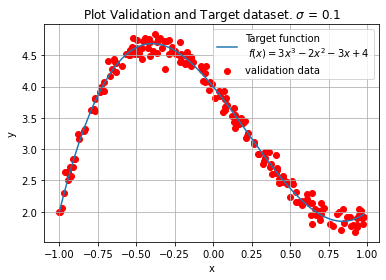

In [7]:
# plot validation and target dataset
plt.plot(x_valid, y_target, label='Target function\n $f(x) = 3x^3-2x^2-3x+4 $')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.title('Plot Validation and Target dataset. '+"$\sigma$ = "+str(sigma))
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


### a.  3 layers

Inizialmente avevo programmato di utilizzare *4 funzioni di attivazioni* differenti ma ho preferito mostrare i risultati ottenute con due: `relu` e `tanh` per mettere meglio in evidenza le differenze nel fitting dei dati di test; ho infatti scelto due funzioni che producono risultati con qualità differente.

Le funzioni di attivazioni sono state ciclate su *2 Funzioni di loss* : `mse` e `msle`.

- *Prima casistica* 
  N_layer | N_neurons | Attivazione | Loss
  --------|-----------|-------------|-----
  1|1|-|mse
  2|20|relu|mse
  3|1|-|mse
  
  ![](Immagini/3_relu_20_mse.jpg)
  

  - *Seconda casistica* 
      N_layer | N_neurons | Attivazione | Loss
      --------|-----------|-------------|-----
  1|1|-|mse
  2|40|relu|mse
  3|1|-|mse
  
  ![](Immagini/3_relu_40_mse.jpg)

  - *Terza casistica* 
         
      N_layer | N_neurons | Attivazione | Loss
      --------|-----------|-------------|-----
  1|1|-|mse
  2|60|relu|mse
  3|1|-|mse
  
  ![](Immagini/3_relu_60_mse.jpg)

  - *Quarta casistica* 
     N_layer | N_neurons | Attivazione | Loss
     --------|-----------|-------------|-----
  1|1|-|msle
  2|20|relu|msle
  3|1|-|msle
  
  ![](Immagini/3_relu_20_msle.jpg)

  - *Quinta casistica* 
     N_layer | N_neurons | Attivazione | Loss
     --------|-----------|-------------|-----
  1|1|-|msle
  2|40|relu|msle
  3|1|-|msle
  
 ![](Immagini/3_relu_40_msle.jpg)

  - *Sesta casistica* 
     N_layer | N_neurons | Attivazione | Loss
     --------|-----------|-------------|-----
  1|1|-|msle
  2|60|relu|msle
  3|1|-|msle
  
  ![](Immagini/3_relu_60_msle.jpg)

Per la funzione di attivazione `tanh` non ho più considerato `msle` come funzione di loss.

  - *Settima casistica* 
     N_layer | N_neurons | Attivazione | Loss
     --------|-----------|-------------|-----
  1|1|-|mse
  2|20|tanh|mse
  3|1|-|mse
  
  ![](Immagini/3_tanh_20_mse.jpg)

  - *Ottava casistica* 
     N_layer | N_neurons | Attivazione | Loss
     --------|-----------|-------------|-----
  1|1|-|mse
  2|40|tanh|mse
  3|1|-|mse
  
  ![](Immagini/3_tanh_40_mse.jpg)

  - *Nona casistica* 
     N_layer | N_neurons | Attivazione | Loss
     --------|-----------|-------------|-----
  1|1|-|mse
  2|60|tanh|mse
  3|1|-|mse
  
  ![](Immagini/3_tanh_60_mse.jpg)

In [ ]:
#===== Parametri utilizzati =====
attivazione= "relu"
#attivazione = "tanh"
loss ="mse"
#loss = "msle"
N_layers = 3
N_neurons = 20

#===== Creazione della rete neurale =====
                                     
    #===== Moduli utilizzati ======
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))  #1° layer--> 1 Nodo
model.add(Dense(N_neurons,activation = attivazione))
model.add(Dense(1,))
model.compile(optimizer='sgd', loss=loss, metrics=['mse'])
    
plt.title("Funzione di attivvazione : "+attivazione+". Neuroni nell'hidden layer : "+str(N_neurons)+ ". Funzione di Loss : "+loss)
#====== Training rete neutale ======
history = model.fit(x=x_train, y=y_train, 
            batch_size=32, epochs=N_epochs, 
            shuffle = True,
            validation_data=(x_valid, y_valid),
            verbose = 0)

#====== Valutazione con dati di Test ======
print("TEST DATA evaluation")
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])
print()

# evaluate with the EXACT curve
print("EXACT CURVE evaluation")
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])

# ===== Plottiing dei risultati sul Test =====
        
estremo = 1.25       #nuovo estremo dal quale estraiamo i dati di testo
# 1. Valore Target
x_valid_new = np.random.uniform(-estremo,estremo, N_valid)
x_valid_new.sort()
y_target_new = f(x_valid_new)
plt.plot(x_valid_new, y_target_new, label='Target function\n $f(x) = 3x^3-2x^2-3x+4 $')
# 2. Predetti in [-1,1]
x_predicted = np.random.uniform(-1, 1, N_valid)
y_predicted = model.predict(x_predicted,verbose = 0)
plt.scatter(x_predicted, y_predicted,color='r',label = "Model prediction su Test")
# 3. Predetti in [-estremo,estremo]
x_predicted = np.random.uniform(-estremo, -1, N_valid)
y_predicted = model.predict(x_predicted,verbose = 0)
plt.scatter(x_predicted, y_predicted,color='orange')
x_predicted = np.random.uniform(1, estremo, N_valid)
y_predicted = model.predict(x_predicted,verbose = 0)
plt.scatter(x_predicted, y_predicted,color='orange')

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

Osservo che la **configurazione migliore** è quella con : funzione di *attivazione* `relu`, `60 neuroni` nell' hidden layer, funzione di *loss* `mse`.

Stampo i dati completi per questa configurazione.

Test loss: 0.018988000229001045
Test accuracy: 0.018988000229001045
4/4 [==============================] - 0s 3ms/step


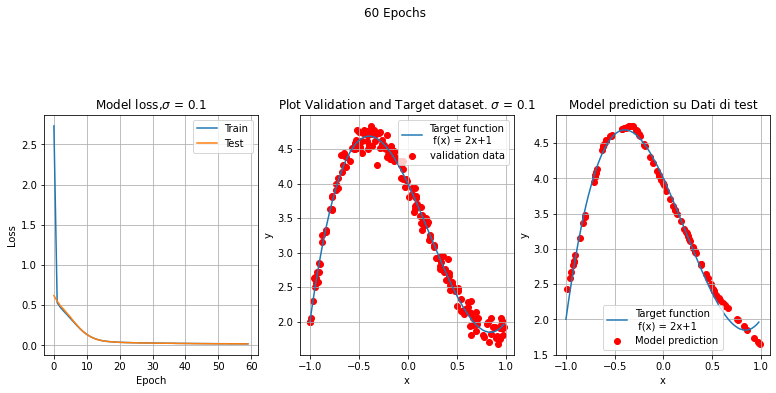

In [29]:
N_epochs = 60
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))  #1° layer--> 1 Nodo
model.add(Dense(60,activation = 'relu'))
model.add(Dense(1,))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    
        
#====== Training rete neutale ======
history = model.fit(x=x_train, y=y_train, 
                  batch_size=32, epochs=N_epochs, 
                  shuffle = True,
                  validation_data=(x_valid, y_valid),
                  verbose = 0)


#====== Valutazione con dati di Test ======
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


plt.figure(figsize=(13,15))
plt.suptitle(str(N_epochs)+" Epochs") 
# Andamenti della funzione di Loss   
plt.subplot(3,3,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss,$\sigma$ = '+str(sigma))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
# Dati di test e funzione target
plt.subplot(3,3,2)
plt.plot(x_valid, y_target, label='Target function\n f(x) = 2x+1')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.title('Plot Validation and Target dataset. '+"$\sigma$ = "+str(sigma))
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)    
# Predizioni sui dati di Test
plt.subplot(3,3,3)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r',label = "Model prediction")
plt.plot(x_valid, y_target ,label='Target function\n f(x) = 2x+1')
plt.legend()
plt.title("Model prediction su Dati di test")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
    
plt.show()

IL modello riesce a fittare abbastanza bene la curva teorica, sebbene non sia in grado di predirne l'andamento fuori dall' intrevallo in cui è stata svolta la calibrazione.

Per provare a migliorare il fit ho **aggiunto** un ulteriore **layer**.

### b. 4 layers

Studio il fitting aggiungendo un layer alla rete neurale. Ho deciso di usare sempre `mse` come funzione di *loss* e di usare `60 neuroni` per entrambi gli *hidden layers*. 

Anche in questo caso ho studiato come viene eseguito il fitting al variare  della *funzione di attivazione* : `relu` e `tanh`.

- *Prima casistica* 
  N_layer | N_neurons | Attivazione | Loss
  --------|-----------|-------------|-----
  1|1|-|mse
  2|60|relu|mse
  3|60|relu|mse
  4|1|-|mse
  
  
  ![](Immagini/4_relu_relu.jpg)
  

- *Seconda casistica* 
  N_layer | N_neurons | Attivazione | Loss
  --------|-----------|-------------|-----
  1|1|-|mse
  2|60|tanh|mse
  3|60|relu|mse
  1|1|-|mse
  
  ![](Immagini/4_tanh_relu.jpg)
  

- *Terza casistica*
  N_layer | N_neurons | Attivazione | Loss
  --------|-----------|-------------|-----
  1|1|-|mse
  2|60|tanh|mse
  3|60|tanh|mse
  4|1|-|mse
  
  
  ![](Immagini/4_tanh_tanh.jpg)

- *Quarta casistica* 
  N_layer | N_neurons | Attivazione | Loss
  --------|-----------|-------------|-----
  1|1|-|mse
  2|60|relu|mse
  3|60|tanh|mse
  4|1|-|mse
  
  
  ![](Immagini/4_relu_tanh.jpg)

In [ ]:
#===== Parametri utilizzati =====
#attivazione = ["relu","tanh","softsign","elu"]
attivazione1= "relu"
#attivazione1= "tanh"
#attivazione2= "relu"
attivazione2= "tanh"
loss = "mse"
N_layers = 4
N_neurons = 60

#===== Creazione della rete neurale =====
                                     
    #===== Moduli utilizzati ======
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))  #1° layer--> 1 Nodo
model.add(Dense(N_neurons,activation = attivazione1))
model.add(Dense(N_neurons,activation = attivazione2))
model.add(Dense(1,))
model.compile(optimizer='sgd', loss=loss, metrics=['mse'])
    
plt.title("Funzione di attivazione1 : "+attivazione1+". Funzione di attivazione2 : "+attivazione2+". Neuroni nell'hidden layer : "+str(N_neurons)+ ". Funzione di Loss : "+loss)
#====== Training rete neutale ======
history = model.fit(x=x_train, y=y_train, 
            batch_size=32, epochs=N_epochs, 
            shuffle = True,
            validation_data=(x_valid, y_valid),
            verbose = 0)

#====== Valutazione con dati di Test ======
print("TEST DATA evaluation")
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])
print()

# evaluate with the EXACT curve
print("EXACT CURVE evaluation")
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])

# ===== Plottiing dei risultati sul Test =====
        
estremo = 1.25       #nuovo estremo dal quale estraiamo i dati di testo
# 1. Valore Target
x_valid_new = np.random.uniform(-estremo,estremo, N_valid)
x_valid_new.sort()
y_target_new = f(x_valid_new)
plt.plot(x_valid_new, y_target_new, label='Target function\n $f(x) = 3x^3-2x^2-3x+4 $')
# 2. Predetti in [-1,1]
x_predicted = np.random.uniform(-1, 1, N_valid)
y_predicted = model.predict(x_predicted,verbose = 0)
plt.scatter(x_predicted, y_predicted,color='r',label = "Model prediction su Test")
# 3. Predetti in [-estremo,estremo]
x_predicted = np.random.uniform(-estremo, -1, N_valid)
y_predicted = model.predict(x_predicted,verbose = 0)
plt.scatter(x_predicted, y_predicted,color='orange')
x_predicted = np.random.uniform(1, estremo, N_valid)
y_predicted = model.predict(x_predicted,verbose = 0)
plt.scatter(x_predicted, y_predicted,color='orange')

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

Osservo che la **configurazione migliore** è quella con : funzione di *attivazione 1* `relu`, funzione di *attivazione 2* `relu`, `60 neuroni` nell' hidden layer, funzione di *loss* `mse`.

Stampo i dati completi per questa configurazione.

Test loss: 0.012653647921979427
Test accuracy: 0.012653647921979427
4/4 [==============================] - 0s 3ms/step


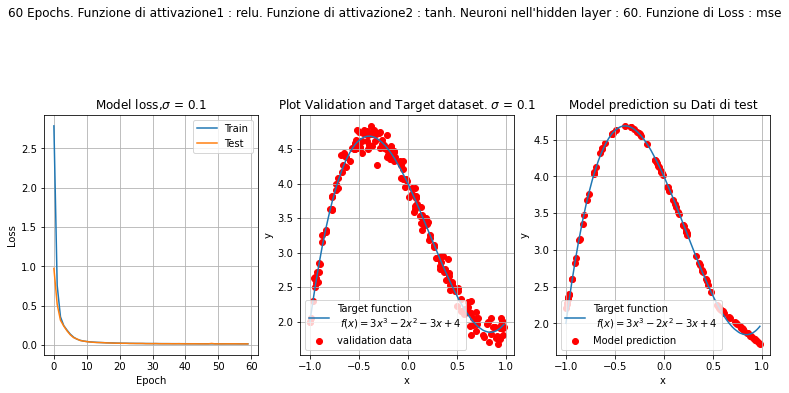

In [36]:
N_epochs = 60
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))  #1° layer--> 1 Nodo
model.add(Dense(60,activation = 'relu'))
model.add(Dense(60,activation = 'relu'))
model.add(Dense(1,))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    
        
#====== Training rete neutale ======
history = model.fit(x=x_train, y=y_train, 
                  batch_size=32, epochs=N_epochs, 
                  shuffle = True,
                  validation_data=(x_valid, y_valid),
                  verbose = 0)


#====== Valutazione con dati di Test ======
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


plt.figure(figsize=(13,15))
plt.suptitle(str(N_epochs)+" Epochs. Funzione di attivazione1 : "+attivazione1+". Funzione di attivazione2 : "+attivazione2+". Neuroni nell'hidden layer : "+str(N_neurons)+ ". Funzione di Loss : "+loss) 
# Andamenti della funzione di Loss   
plt.subplot(3,3,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss,$\sigma$ = '+str(sigma))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
# Dati di test e funzione target
plt.subplot(3,3,2)
plt.plot(x_valid, y_target, label='Target function\n $f(x) = 3x^3-2x^2-3x+4 $')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.title('Plot Validation and Target dataset. '+"$\sigma$ = "+str(sigma))
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)    
# Predizioni sui dati di Test
plt.subplot(3,3,3)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r',label = "Model prediction")
plt.plot(x_valid, y_target ,label='Target function\n $f(x) = 3x^3-2x^2-3x+4 $')
plt.legend()
plt.title("Model prediction su Dati di test")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
    
plt.show()

I risultati ottenuti sono migliori rispetto al caso con *3* soli layer. Persiste l' incapacità del modello di prevedere l' adamento della funzione fuori dall' intervallo in cui è stato fatto il training.

### c. 5 layers
Espando la *NN* a *5 layers*, ciascuno con funzione di attivazione `relu` e funzione di loss `mse`. 

  N_layer | N_neurons | Attivazione | Loss
  --------|-----------|-------------|-----
  1|1|-|mse
  2|60|relu|mse
  3|40|relu|mse
  4|20|relu|mse
  1|1|-|mse
    
    
  

Test loss: 0.010907644405961037
Test accuracy: 0.010907644405961037
4/4 [==============================] - 0s 3ms/step


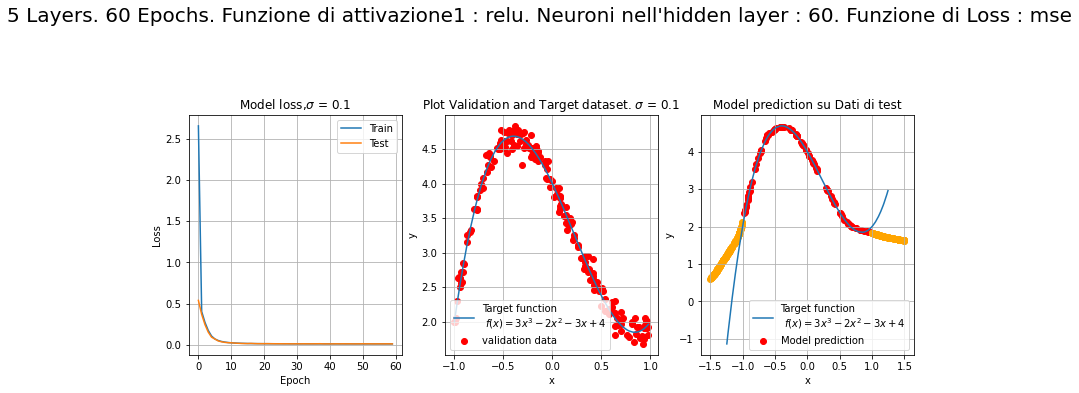

In [38]:
N_epochs = 60
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))  #1° layer--> 1 Nodo
model.add(Dense(60,activation = 'relu'))
model.add(Dense(40,activation = 'relu'))
model.add(Dense(20,activation = 'relu'))
model.add(Dense(1,))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    
        
#====== Training rete neutale ======
history = model.fit(x=x_train, y=y_train, 
                  batch_size=32, epochs=N_epochs, 
                  shuffle = True,
                  validation_data=(x_valid, y_valid),
                  verbose = 0)


#====== Valutazione con dati di Test ======
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


plt.figure(figsize=(13,15))
plt.suptitle("5 Layers. "+str(N_epochs)+" Epochs. Funzione di attivazione1 : "+attivazione1+". Neuroni nell'hidden layer : "+str(N_neurons)+ ". Funzione di Loss : "+loss, fontsize = 20) 
# Andamenti della funzione di Loss   
plt.subplot(3,3,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss,$\sigma$ = '+str(sigma))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
# Dati di test e funzione target
plt.subplot(3,3,2)
plt.plot(x_valid, y_target, label='Target function\n $f(x) = 3x^3-2x^2-3x+4 $')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.title('Plot Validation and Target dataset. '+"$\sigma$ = "+str(sigma))
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)  

# Predizioni sui dati di Test
plt.subplot(3,3,3)
x_valid_new = np.random.uniform(-estremo,estremo, N_valid)
x_valid_new.sort()
y_target_new = f(x_valid_new)
plt.plot(x_valid_new, y_target_new, label='Target function\n $f(x) = 3x^3-2x^2-3x+4 $')
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r',label = "Model prediction")
# 3. Predetti in [-estremo,estremo]
x_predicted = np.random.uniform(-1.5, -1, N_valid)
y_predicted = model.predict(x_predicted,verbose = 0)
plt.scatter(x_predicted, y_predicted,color='orange')
x_predicted = np.random.uniform(1, 1.5, N_valid)
y_predicted = model.predict(x_predicted,verbose = 0)
plt.scatter(x_predicted, y_predicted,color='orange')
plt.legend()
plt.title("Model prediction su Dati di test")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
    
plt.show()

I risultati ottenuti sono migliori rispetto al caso con *4* soli layer. Persiste l' incapacità del modello di prevedere l' adamento della funzione fuori dall' intervallo in cui è stato fatto il training.

## Exercise 11.3

Utilizzo l'ultima rete neurale costruita per provare a fittare la seguente funzione trigonometrica 2D:

$$f(x,y) = \sin(x^2+y^2)$$ 

nel range $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$.

Utilizzo una rete neurale con *5 layers* costruita nel seguente modo:

  N_layer | N_neurons | Attivazione | Loss
  --------|-----------|-------------|-----
  1|2|-|mse
  2|60|relu|mse
  3|40|relu|mse
  4|20|relu|mse
  1|1|-|mse
  
  Vista la natura del problema, è stato aggiunto un neurono al primo layer.
  
  I parametri utilizzati sono i seguenti:   $N_{epochs}=60$, $N_{train} = 10000$ , $N_{test} = 2000$ e $\sigma = 0.1$.+
  
  Rispetto all' esercizio precedente, i dati di *training* sono aumentati per assicurarsi un buon fitting.

In [68]:
N_epochs = 60
N_train = 10000     # Train
N_valid = 2000       # Test
sigma = 0.1

#===== Generazione dei dati di Train e test ======
def g(x,y):
        return np.sin(x**2+y**2)
    

lim = 3./2.
np.random.seed(0)  #setto il seme del generatore in modo che sia riproducibile
x_train = np.random.uniform(-lim, lim, N_train)
x_valid = np.random.uniform(-lim, lim, N_valid)
y_train = np.random.uniform(-lim, lim, N_train)
y_valid = np.random.uniform(-lim, lim, N_valid)

xy_train = np.column_stack((x_train,y_train)) 
xy_valid = np.column_stack((x_valid,y_valid)) 
z_target = g(x_valid,y_valid)

z_train = np.random.normal(g(x_train,y_train), sigma)
z_valid = np.random.normal(g(x_valid,y_valid), sigma)


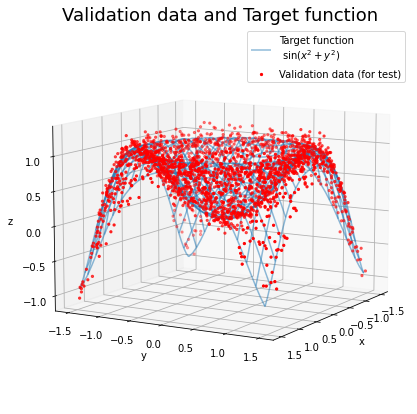

In [69]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(projection = '3d')

x_surf = np.arange(-lim,lim, 0.07)
y_surf = np.arange(-lim,lim, 0.07)
X_surf, Y_surf = np.meshgrid(x_surf,y_surf)
ax.plot_wireframe(  X_surf, Y_surf, g(X_surf,Y_surf), 
                    rstride=2, cstride=2, 
                    label='Target function\n $\sin(x^2+y^2)$',
                    alpha = 0.5)

ax.scatter(x_valid, y_valid, z_valid, marker = ".", color = "r", label='Validation data (for test)')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Validation data and Target function", fontsize = 18)
ax.legend()
ax.view_init(10, 30)

plt.show()



In [70]:
# ====== Composizione della rete neurale
loss = 'mse'
activation = 'relu'
optimizer = 'sgd'
model = tf.keras.Sequential()
model.add(Dense(2, input_shape=(2,)))  #1° layer--> 1 Nodo. input = 2
model.add(Dense(60,activation = 'relu'))
model.add(Dense(40,activation = 'relu'))
model.add(Dense(20,activation = 'relu'))
model.add(Dense(1,))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [71]:
history = model.fit(x=xy_train, y=z_train, 
          batch_size=32, epochs=N_epochs,
          shuffle=True,
          validation_data=(xy_valid, z_valid))

Epoch 1/60
313/313 [==============================] - 3s 7ms/step - loss: 0.1733 - mse: 0.1733 - val_loss: 0.1392 - val_mse: 0.1392
Epoch 2/60
313/313 [==============================] - 2s 6ms/step - loss: 0.1455 - mse: 0.1455 - val_loss: 0.1305 - val_mse: 0.1305
Epoch 3/60
313/313 [==============================] - 1s 5ms/step - loss: 0.1338 - mse: 0.1338 - val_loss: 0.1183 - val_mse: 0.1183
Epoch 4/60
313/313 [==============================] - 2s 5ms/step - loss: 0.1197 - mse: 0.1197 - val_loss: 0.1084 - val_mse: 0.1084
Epoch 5/60
313/313 [==============================] - 2s 6ms/step - loss: 0.1103 - mse: 0.1103 - val_loss: 0.1019 - val_mse: 0.1019
Epoch 6/60
313/313 [==============================] - 1s 5ms/step - loss: 0.1038 - mse: 0.1038 - val_loss: 0.0983 - val_mse: 0.0983
Epoch 7/60
313/313 [==============================] - 2s 6ms/step - loss: 0.0990 - mse: 0.0990 - val_loss: 0.0951 - val_mse: 0.0951
Epoch 8/60
313/313 [==============================] - 1s 5ms/step - loss: 0.

Test loss: 0.010905173607170582
Test accuracy: 0.010905173607170582
5 Layers. 60 Epochs. Funzione di attivazione : relu. Funzione di Loss : mse


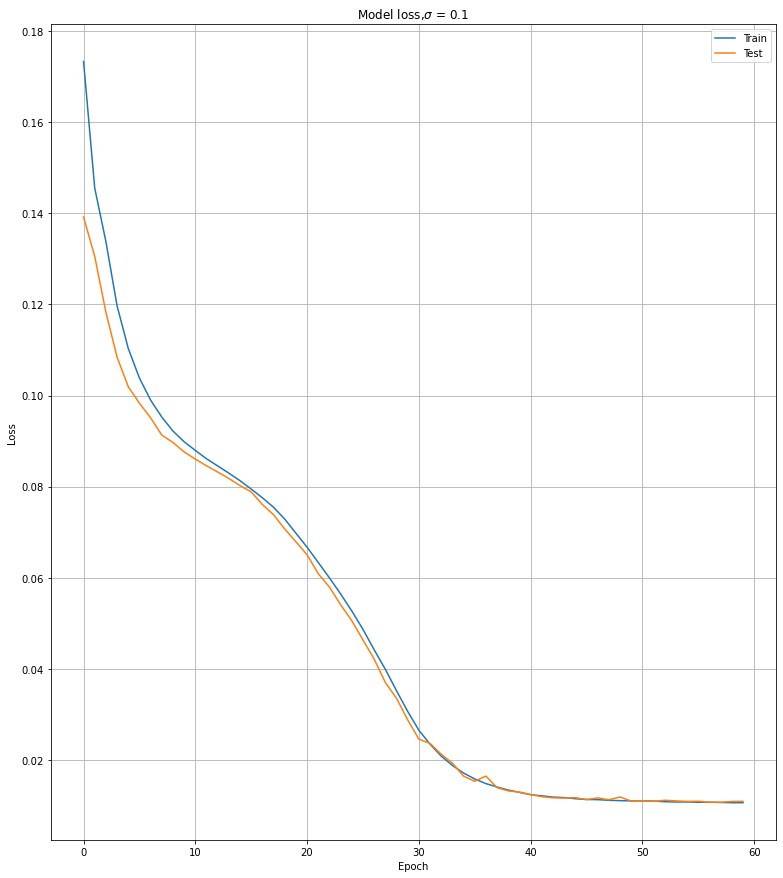

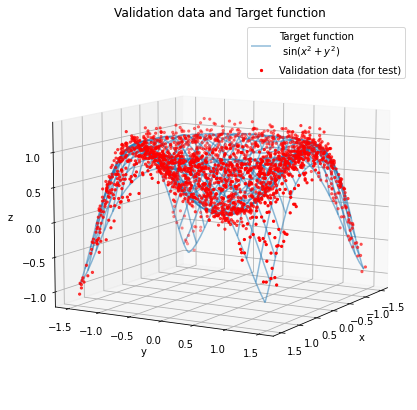

63/63 [==============================] - 0s 2ms/step


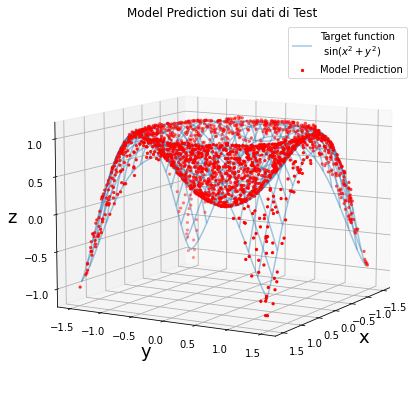

In [72]:
score = model.evaluate(xy_valid, z_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


print("5 Layers. "+str(N_epochs)+" Epochs. Funzione di attivazione : "+attivazione1+". Funzione di Loss : "+loss) 

#======= Andamenti della funzione di Loss ========  
plt.figure(figsize=(13,15))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss,$\sigma$ = '+str(sigma))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

#======= Dati di test e funzione target =======

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(projection = '3d')

x_surf = np.arange(-lim,lim, 0.07)
y_surf = np.arange(-lim,lim, 0.07)
X_surf, Y_surf = np.meshgrid(x_surf,y_surf)
ax.plot_wireframe(  X_surf, Y_surf, g(X_surf,Y_surf), 
                    rstride=2, cstride=2, 
                    label='Target function\n $\sin(x^2+y^2)$',
                    alpha = 0.5)

ax.scatter(x_valid, y_valid, z_valid, marker = ".", color = "r", label='Validation data (for test)')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Validation data and Target function")
ax.legend()
ax.view_init(10, 30)
plt.show()
  
# ====== Predizioni sui dati di Test ======
x_predicted = np.random.uniform(-lim, lim, N_valid) 
y_predicted = np.random.uniform(-lim, lim, N_valid) 
XY_predicted = np.column_stack((x_predicted,y_predicted))
z_predicted = model.predict(XY_predicted)

# plot

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(projection = '3d')

ax.plot_wireframe(  X_surf, Y_surf, g(X_surf,Y_surf), 
                    rstride=2, cstride=2, 
                    label='Target function\n $\sin(x^2+y^2)$',
                    alpha = 0.4)
ax.scatter(x_predicted, y_predicted, z_predicted, marker = ".", color = "r", label='Model Prediction')
ax.set_xlabel("x", fontsize = 18)
ax.set_ylabel("y", fontsize = 18)
ax.set_zlabel("z", fontsize = 18)
plt.title("Model Prediction sui dati di Test")
ax.legend()
ax.view_init(10, 30)
plt.show()

Ho usato un alto numero di $N_{train}$ per per coprire più dominio possibile. La rete ha delle ottime prestazioni e funziona bene anche in corrispondenza dei 4 angoli ( questo mi fa pensare che il numero di  $N_{train}$ sia sufficiente).

In fine ho verificato le capacità della rete di fittare dati al di **fuori dell' intervallo di training**, generando dati compresi negli intervalli $x \in [-2,2]$ e $y \in [-2,2]$.

63/63 [==============================] - 0s 2ms/step


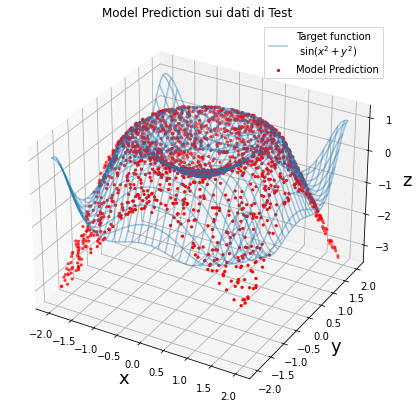

In [74]:
lim = 2
x_predicted = np.random.uniform(-lim, lim, N_valid) 
y_predicted = np.random.uniform(-lim, lim, N_valid) 
XY_predicted = np.column_stack((x_predicted,y_predicted))
z_predicted = model.predict(XY_predicted)

# plot

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(projection = '3d')
x_surf = np.arange(-lim,lim, 0.07)
y_surf = np.arange(-lim,lim, 0.07)
X_surf, Y_surf = np.meshgrid(x_surf,y_surf)
ax.plot_wireframe(  X_surf, Y_surf, g(X_surf,Y_surf), 
                    rstride=2, cstride=2, 
                    label='Target function\n $\sin(x^2+y^2)$',
                    alpha = 0.4)
ax.scatter(x_predicted, y_predicted, z_predicted, marker = ".", color = "r", label='Model Prediction')
ax.set_xlabel("x", fontsize = 18)
ax.set_ylabel("y", fontsize = 18)
ax.set_zlabel("z", fontsize = 18)
plt.title("Model Prediction sui dati di Test")
ax.legend()
#ax.view_init(10, 30)
plt.show()

Corentemente con quanto mi sarei aspettata, la rete neurale è in grado di fittare bene i dati di *Test* fino al punto di minimo; non è invece in grado di prevedere l'andamento crescente della funzione.